# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)

lat_lngs = zip(lats, lngs)

In [4]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=lebu" 

response = requests.get(query_url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 83
    },
    "cod": 200,
    "coord": {
        "lat": -37.6167,
        "lon": -73.65
    },
    "dt": 1690148905,
    "id": 3883457,
    "main": {
        "feels_like": 281.24,
        "grnd_level": 1017,
        "humidity": 84,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 282.16,
        "temp_max": 282.16,
        "temp_min": 282.16
    },
    "name": "Lebu",
    "sys": {
        "country": "CL",
        "sunrise": 1690113706,
        "sunset": 1690149603
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 172,
        "gust": 1.99,
        "speed": 1.94
    }
}


In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

In [7]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        
        
        ###why i>= 50? 0, lebu isnt >= 50 but still appears in list 
        
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s |%s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 |brookings
Processing Record 2 of Set 1 |ushuaia
Processing Record 3 of Set 1 |leh
Processing Record 4 of Set 1 |wesley
Processing Record 5 of Set 1 |polyarnyy
Processing Record 6 of Set 1 |bilibino
Processing Record 7 of Set 1 |port mathurin
Processing Record 8 of Set 1 |saksaul'skiy
City not found. Skipping...
Processing Record 9 of Set 1 |arraial do cabo
Processing Record 10 of Set 1 |puerto natales
Processing Record 11 of Set 1 |puerto baquerizo moreno
Processing Record 12 of Set 1 |blackmans bay
Processing Record 13 of Set 1 |stanley
Processing Record 14 of Set 1 |udachny
Processing Record 15 of Set 1 |iqaluit
Processing Record 16 of Set 1 |ataq
Processing Record 17 of Set 1 |mariental
Processing Record 18 of Set 1 |tolanaro
Processing Record 19 of Set 1 |aasiaat
Processing Record 20 of Set 1 |leava
Processing Record 21 of Set 1 |talnakh
Processing Record 22 of Set 1 |grytviken
Processing Reco

Processing Record 41 of Set 4 |lubang
Processing Record 42 of Set 4 |wingham
Processing Record 43 of Set 4 |itaituba
Processing Record 44 of Set 4 |vuktyl
Processing Record 45 of Set 4 |shumerlya
Processing Record 46 of Set 4 |dalandzadgad
Processing Record 47 of Set 4 |fort st. john
Processing Record 48 of Set 4 |st. paul
Processing Record 49 of Set 4 |nova vicosa
Processing Record 0 of Set 5 |cluain meala
Processing Record 1 of Set 5 |keelung
Processing Record 2 of Set 5 |port elizabeth
Processing Record 3 of Set 5 |al jawf
Processing Record 4 of Set 5 |suva
Processing Record 5 of Set 5 |porto novo
Processing Record 6 of Set 5 |port augusta
Processing Record 7 of Set 5 |cotoca
Processing Record 8 of Set 5 |jerome
Processing Record 9 of Set 5 |saudarkrokur
Processing Record 10 of Set 5 |nishinoomote
Processing Record 11 of Set 5 |south hedland
Processing Record 12 of Set 5 |gizo
Processing Record 13 of Set 5 |zhumysker
Processing Record 14 of Set 5 |portland
Processing Record 15 of Se

Processing Record 37 of Set 8 |maitum
Processing Record 38 of Set 8 |entebbe
Processing Record 39 of Set 8 |bugene
Processing Record 40 of Set 8 |mek'ele
Processing Record 41 of Set 8 |afif
Processing Record 42 of Set 8 |nizhniy odes
Processing Record 43 of Set 8 |palopo
Processing Record 44 of Set 8 |puerto ayora
Processing Record 45 of Set 8 |barakani
Processing Record 46 of Set 8 |marquelia
Processing Record 47 of Set 8 |mata-utu
Processing Record 48 of Set 8 |serdar
Processing Record 49 of Set 8 |ocean shores
Processing Record 0 of Set 9 |tanjung pandan
Processing Record 1 of Set 9 |iskateley
Processing Record 2 of Set 9 |cozumel
Processing Record 3 of Set 9 |port-la-nouvelle
Processing Record 4 of Set 9 |ruidoso
Processing Record 5 of Set 9 |saipan
Processing Record 6 of Set 9 |weno
Processing Record 7 of Set 9 |usinsk
Processing Record 8 of Set 9 |orange walk
Processing Record 9 of Set 9 |ar ruseris
Processing Record 10 of Set 9 |paramonga
Processing Record 11 of Set 9 |fort brag

Processing Record 31 of Set 12 |trstena
Processing Record 32 of Set 12 |taltal
Processing Record 33 of Set 12 |antsiranana
Processing Record 34 of Set 12 |bu'aale
Processing Record 35 of Set 12 |blenheim
Processing Record 36 of Set 12 |ust'-kulom
Processing Record 37 of Set 12 |yur'yevets
Processing Record 38 of Set 12 |chas
Processing Record 39 of Set 12 |kassala
Processing Record 40 of Set 12 |demyansk
Processing Record 41 of Set 12 |shadegan
Processing Record 42 of Set 12 |nagqu
Processing Record 43 of Set 12 |bikenibeu village
Processing Record 44 of Set 12 |mareeba
Processing Record 45 of Set 12 |maragogi
Processing Record 46 of Set 12 |kardla
Processing Record 47 of Set 12 |oodweyne
Processing Record 48 of Set 12 |marsa alam
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,brookings,44.3114,-96.7984,30.19,57,6,2.20,US,1690149196
1,ushuaia,-54.8000,-68.3000,0.81,75,75,4.12,AR,1690149083
2,leh,34.1667,77.5833,16.56,58,45,1.78,IN,1690149198
3,wesley,15.5667,-61.3167,28.74,79,40,4.63,DM,1690149198
4,polyarnyy,69.1989,33.4478,9.06,91,100,6.18,RU,1690149198


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label = "City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col = "City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brookings,44.3114,-96.7984,30.19,57,6,2.20,US,1690149196
1,ushuaia,-54.8000,-68.3000,0.81,75,75,4.12,AR,1690149083
2,leh,34.1667,77.5833,16.56,58,45,1.78,IN,1690149198
3,wesley,15.5667,-61.3167,28.74,79,40,4.63,DM,1690149198
4,polyarnyy,69.1989,33.4478,9.06,91,100,6.18,RU,1690149198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

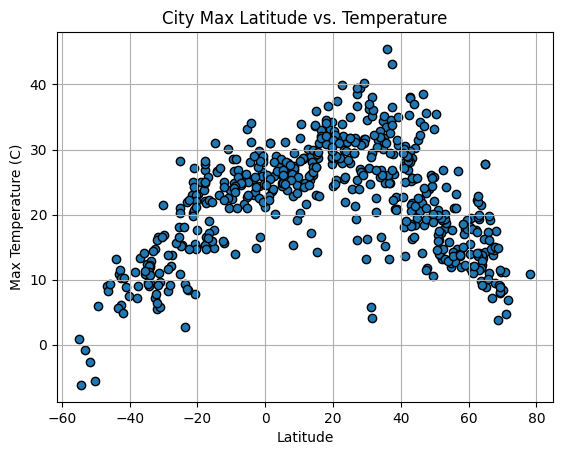

In [12]:
# Build scatter plot for latitude vs. temperature
lat_data = city_data_df["Lat"]
max_temp_data = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(lat_data, max_temp_data, edgecolors = "black")
plt.grid()
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

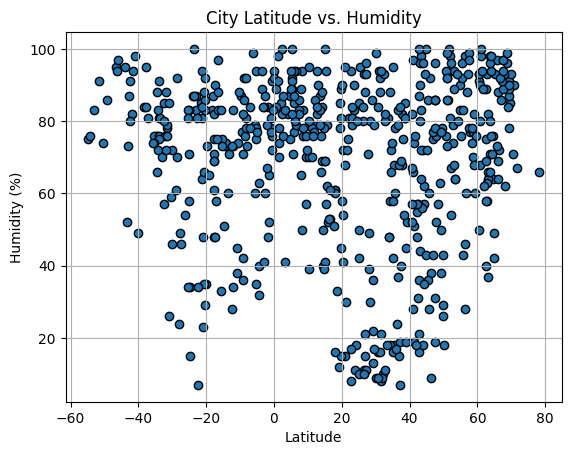

In [13]:
# Build scatter plot for latitude vs. temperature
humidity_data = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(lat_data, humidity_data, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

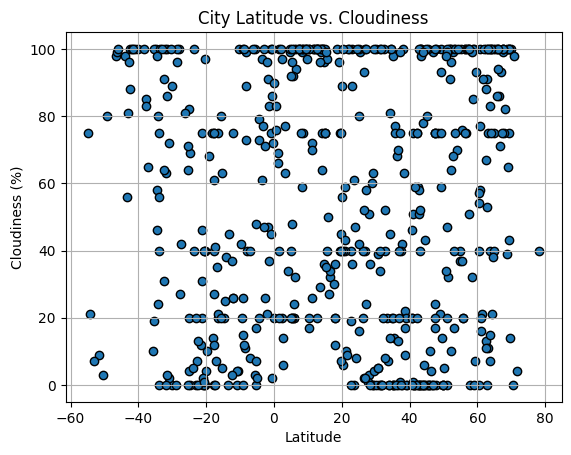

In [14]:
# Build scatter plot for latitude vs. temperature
cloud_data = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(lat_data, cloud_data, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

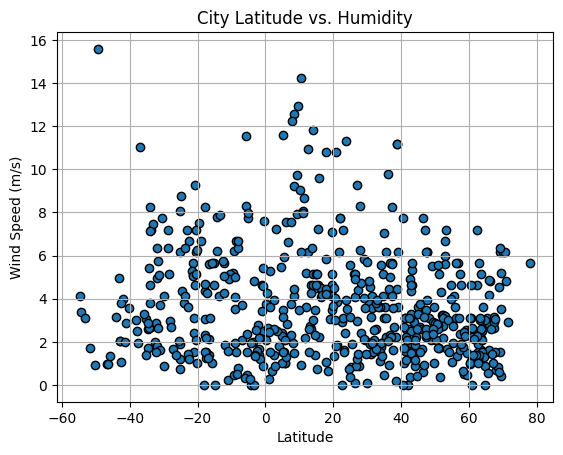

In [15]:
# Build scatter plot for latitude vs. temperature
wind_speed_data = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat_data, wind_speed_data, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, equation_location):
    
    plt.scatter(x_values, y_values)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = (x_values * slope) + intercept
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, equation_location, fontsize = 15, color = "red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(f"The r-value is: {rvalue}")


In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brookings,44.3114,-96.7984,30.19,57,6,2.20,US,1690149196
2,leh,34.1667,77.5833,16.56,58,45,1.78,IN,1690149198
3,wesley,15.5667,-61.3167,28.74,79,40,4.63,DM,1690149198
4,polyarnyy,69.1989,33.4478,9.06,91,100,6.18,RU,1690149198
5,bilibino,68.0546,166.4372,17.44,62,82,0.69,RU,1690149199


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,0.81,75,75,4.12,AR,1690149083
6,port mathurin,-19.6833,63.4167,23.14,73,10,7.49,MU,1690149199
7,arraial do cabo,-22.9661,-42.0278,21.92,83,0,7.20,BR,1690149200
8,puerto natales,-51.7236,-72.4875,-2.61,91,9,1.72,CL,1690149200
9,puerto baquerizo moreno,-0.9000,-89.6000,26.55,78,75,4.63,EC,1690149200


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5855610547136553


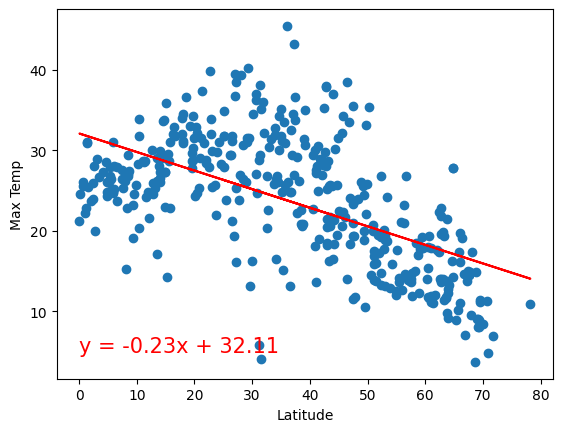

In [19]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", (0,5))

The r-value is: 0.8280558303160879


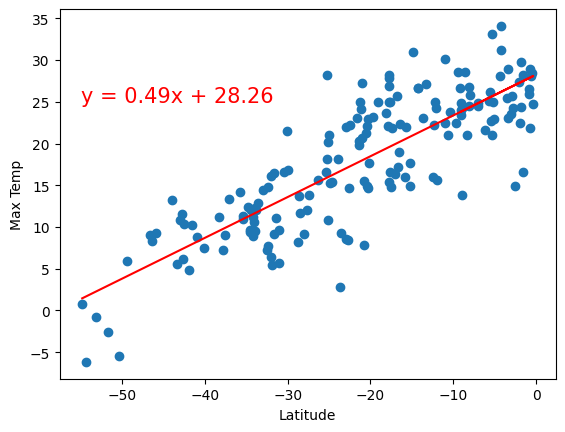

In [20]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", (-55, 25))

**Discussion about the linear relationship:** 

The r-value for the Northern Hemisphere plot of Max Temp vs Lat is about -0.60. This means that lat and max temp have some linear correlation. Since the r-value is negative, they have a negative relationship. So as latitude increases, max temp decreases.

The r-value for the Southern Hemisphere plot of Max Temp vs Lat is about 0.79. This means that lat and max temp have a strong linear correlation. Since the r-value is positive, they have a positive relationship. So as latitude increases, max temp also increases.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.062479467857656505


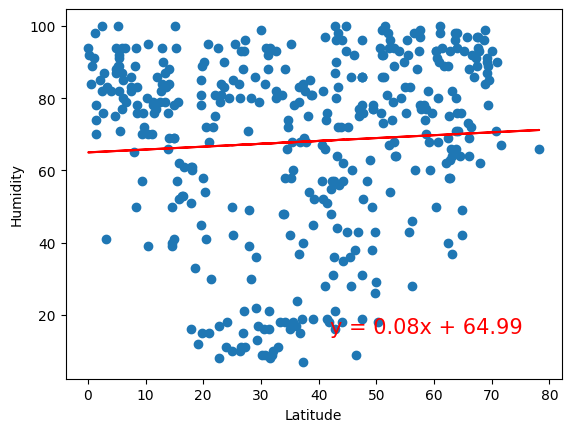

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", (42,15))

The r-value is: -0.14194436310666325


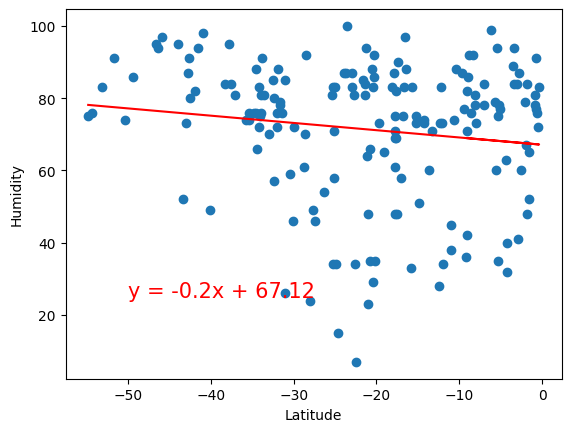

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", (-50,25))

**Discussion about the linear relationship:** 

The r-value for the Northern Hemisphere plot of Humidity vs Lat is about -0.015. This means that lat and humidity don't have a linear correlation.

The r-value for the Southern Hemisphere plot of Humidity vs Lat is about 0.16. This means that lat and humidity are slightly linearly correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.010719782126729409


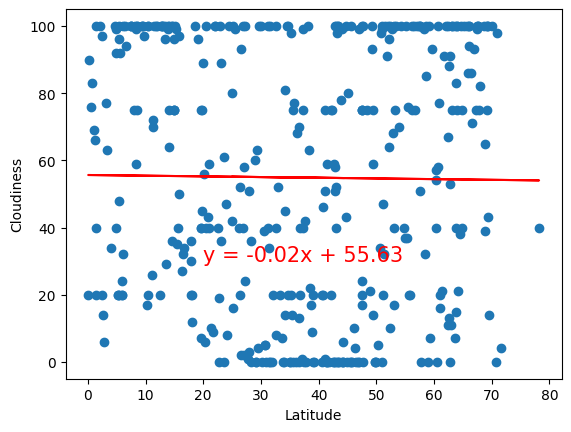

In [23]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (20,30))

The r-value is: -0.16384178655863882


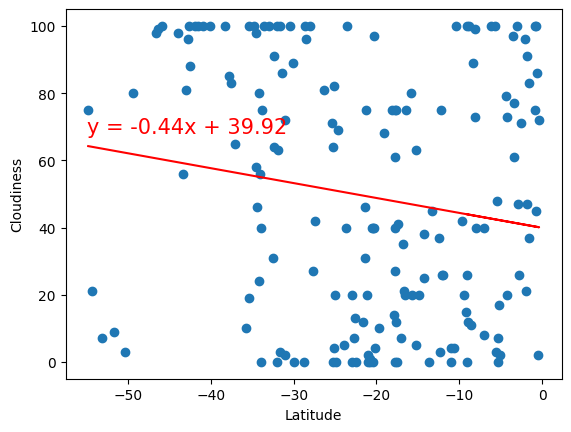

In [24]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", (-55,68))

**Discussion about the linear relationship:** 

The r-value for the Northern Hemisphere plot of Cloudiness vs Lat is about -0.041. This means that lat and cloudiness don't have a linear correlation.

The r-value for the Southern Hemisphere plot of Cloudiness vs Lat is about -0.19. This means that lat and cloudiness are slightly linearly correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.23991637612716246


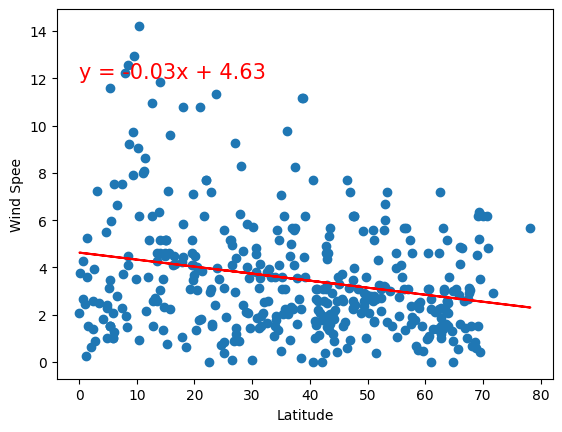

In [25]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Spee", (0,12))

The r-value is: -0.052699375185747584


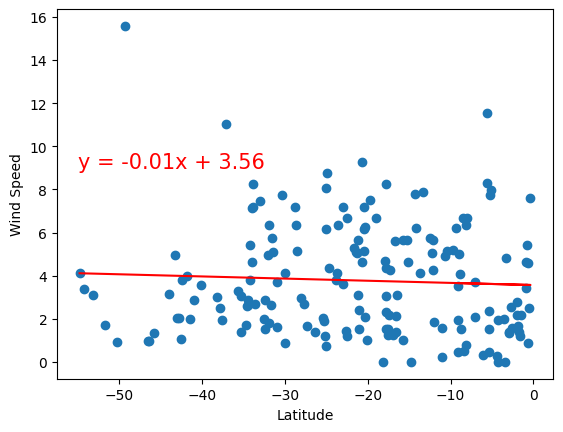

In [26]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", (-55,9))

**Discussion about the linear relationship:** 

The r-value for the Northern Hemisphere plot of Wind Speed vs Lat is about -0.14. This means that lat and wind speed are slightly linearly correlated.

The r-value for the Southern Hemisphere plot of Wind Speed vs Lat is about -0.13. This means that lat and wind speed are slightly linearly correlated. 